This demo implements online stochastic gradient descent for estimating the three parameters of
a linear model.
1. Familiarize yourself with every step of the code. For information on stochastic gradient
descent, I recommend the following Wikipedia pages:
http://en.wikipedia.org/wiki/Stochastic_gradient_descent
http://en.wikipedia.org/wiki/Gradient_descent
http://en.wikipedia.org/wiki/Gradient
Reading the above pages will maximize the opportunity for you to learn about optimization
on Thursday’s lecture.

2. Modify section 5 of the code (Test the trained model) to compute the predictions for
the following test dataset of three observations and two input features (fertilizer and
insecticide):
dataTest = torch.Tensor{
{6, 4},
{10, 5},
{14, 8}
}
What are the values of the three parameters? What happens to the parameters and
predictions when the number of epochs is either 1e3 (1 × 10 3 ) or 1e5 (1 × 10 5 )? Hand in
the answers to these questions.

3. Implement the least squares solution
θ = (X T X) −1 X T y
using the same dataset. What are the predictions for the above test set? How do they
compare to the predictions of the linear neuron trained with SGD? How do the parameters
compare? Hand in your answers.

#### Advanced: For enthusiastic students ####
Implement the nonlinear regression demos with polynomials described in Lecture 3. That is,
generate data with a second order polynomial and use polynomials of different orders to estimate
the nonlinear regression function. Confirm what happens as you vary the number of data, and
the regularization coefficient.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

train_data = torch.Tensor([
   [40,  6,  4],
   [44, 10,  4],
   [46, 12,  5],
   [48, 14,  7],
   [52, 16,  9],
   [58, 18, 12],
   [60, 22, 14],
   [68, 24, 20],
   [74, 26, 21],
   [80, 32, 24]])
test_data = torch.Tensor([
    [6, 4],
    [10, 5],
    [4, 8]])

<bound method Variable.view of Variable containing:
 3479.4595
[torch.FloatTensor of size 1]
>
<bound method Variable.view of Variable containing:
 218.0300
[torch.FloatTensor of size 1]
>
<bound method Variable.view of Variable containing:
 147.2468
[torch.FloatTensor of size 1]
>
<bound method Variable.view of Variable containing:
 144.6231
[torch.FloatTensor of size 1]
>
<bound method Variable.view of Variable containing:
 143.4717
[torch.FloatTensor of size 1]
>
Epoch [5/1000], Loss: 143.4717
<bound method Variable.view of Variable containing:
 142.3684
[torch.FloatTensor of size 1]
>
<bound method Variable.view of Variable containing:
 141.2824
[torch.FloatTensor of size 1]
>
<bound method Variable.view of Variable containing:
 140.2128
[torch.FloatTensor of size 1]
>
<bound method Variable.view of Variable containing:
 139.1593
[torch.FloatTensor of size 1]
>
<bound method Variable.view of Variable containing:
 138.1217
[torch.FloatTensor of size 1]
>
Epoch [10/1000], Loss: 138.1

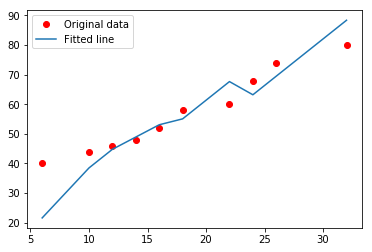

Variable containing:
 21.5882
 36.3319
  4.5411
[torch.FloatTensor of size 3x1]



In [51]:
# Hyper Parameters
input_size = 2
output_size = 1
num_epochs = 1000
learning_rate = 0.001

# Toy Dataset 
x_train = train_data[:,1:3]

y_train = train_data[:,0]

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)


# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the Model 
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(x_train)
    targets = Variable(y_train)

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data[0]))
        
# Plot the graph
predicted = model(inputs).data.numpy()
plt.plot(x_train.numpy()[0:,0], y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy()[0:,0], predicted, label='Fitted line')
plt.legend()
plt.show()

# using test data to make prediction
predicted_test = model(Variable(test_data))
print(predicted_test)


# Save the Model
# torch.save(model, 'model.pkl')

with the number of epochs 10000: the Loss = 5.37
with the number of epochs 100000: the Loss = 1.3670
with the number of epochs 1000: the Loss = 53.7466, predictions = [21.8778 parameters = 
                                                                   36.4507
                                                                    5.1435]


In [74]:
class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.fc = torch.nn.Linear(2, 1)
                
    def forward(self, x):
        return self.fc(x)
x = Variable(x_train)
y = Variable(y_train) 
x_test = Variable(test_data)
model = Model()    
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

losses = [] # Added

for i in range(5000):
    optimizer.zero_grad()
    outputs = model(x)
    
    loss = criterion(outputs, y)
    losses.append(loss.data[0]) # Added
    loss.backward()
    
    optimizer.step()
    
    if loss.data[0] < 1e-4:
        break    
    
print('n_iter', i)
print(loss.data[0])
print(model(x_test))
print("learnt parameters: ", optimizer.param_groups[0])

n_iter 4999
62.81121063232422
Variable containing:
 20.3192
 35.6677
  2.3121
[torch.FloatTensor of size 3x1]

learnt parameters:  {'lr': 0.0001, 'momentum': 0, 'nesterov': False, 'params': [Parameter containing:
 4.4112 -2.2962
[torch.FloatTensor of size 1x2]
, Parameter containing:
 3.0367
[torch.FloatTensor of size 1]
], 'dampening': 0, 'weight_decay': 0}


In [ ]:
[6, 4]
[10, 5],
[4, 8]])
require 'torch'
require 'optim'
require 'nn'

data = torch.Tensor{
   {40,  6,  4},
   {44, 10,  4},
   {46, 12,  5},
   {48, 14,  7},
   {52, 16,  9},
   {58, 18, 12},
   {60, 22, 14},
   {68, 24, 20},
   {74, 26, 21},
   {80, 32, 24}
}

model = nn.Sequential()                 -- define the container
ninputs = 2; noutputs = 1
model:add(nn.Linear(ninputs, noutputs)) -- define the only module



x, dl_dx = model:getParameters()

-- In the following code, we define a closure, feval, which computes
-- the value of the loss function at a given point x, and the gradient of
-- that function with respect to x. x is the vector of trainable weights,
-- which, in this example, are all the weights of the linear matrix of
-- our model, plus one bias.

feval = function(x_new)
   -- set x to x_new, if differnt
   -- (in this simple example, x_new will typically always point to x,
   -- so the copy is really useless)
   if x ~= x_new then
      x:copy(x_new)
   end

   -- select a new training sample
   _nidx_ = (_nidx_ or 0) + 1
   if _nidx_ > (#data)[1] then _nidx_ = 1 end

   local sample = data[_nidx_]
   local target = sample[{ {1} }]      -- this funny looking syntax allows
   local inputs = sample[{ {2,3} }]    -- slicing of arrays.

   -- reset gradients (gradients are always accumulated, to accommodate 
   -- batch methods)
   dl_dx:zero()

   -- evaluate the loss function and its derivative wrt x, for that sample
   local loss_x = criterion:forward(model:forward(inputs), target)
   model:backward(inputs, criterion:backward(model.output, target))

   -- return loss(x) and dloss/dx
   return loss_x, dl_dx
end

sgd_params = {
   learningRate = 1e-3,
   learningRateDecay = 1e-4,
   weightDecay = 0,
   momentum = 0
}

for i = 1,1e4 do

   -- this variable is used to estimate the average loss
   current_loss = 0

   -- an epoch is a full loop over our training data
   for i = 1,(#data)[1] do

      -- optim contains several optimization algorithms. 
      -- All of these algorithms assume the same parameters:
      --   + a closure that computes the loss, and its gradient wrt to x, 
      --     given a point x
      --   + a point x
      --   + some parameters, which are algorithm-specific
      
      _,fs = optim.sgd(feval,x,sgd_params)

      -- Functions in optim all return two things:
      --   + the new x, found by the optimization method (here SGD)
      --   + the value of the loss functions at all points that were used by
      --     the algorithm. SGD only estimates the function once, so
      --     that list just contains one value.

      current_loss = current_loss + fs[1]
   end

   -- report average error on epoch
   current_loss = current_loss / (#data)[1]
   print('current loss = ' .. current_loss)
   
   logger:add{['training error'] = current_loss}
   logger:style{['training error'] = '-'}
   logger:plot()  
end

text = {40.32, 42.92, 45.33, 48.85, 52.37, 57, 61.82, 69.78, 72.19, 79.42}

print('id  approx   text')
for i = 1,(#data)[1] do
   local myPrediction = model:forward(data[i][{{2,3}}])
   print(string.format("%2d  %6.2f %6.2f", i, myPrediction[1], text[i]))
end

In [3]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Model
torch.save(model, 'model.pkl')

Processing
Done!
Epoch: [1/5], Step: [100/600], Loss: 2.2189
Epoch: [1/5], Step: [200/600], Loss: 2.0958
Epoch: [1/5], Step: [300/600], Loss: 1.9867
Epoch: [1/5], Step: [400/600], Loss: 1.9790
Epoch: [1/5], Step: [500/600], Loss: 1.8646
Epoch: [1/5], Step: [600/600], Loss: 1.7493
Epoch: [2/5], Step: [100/600], Loss: 1.7162
Epoch: [2/5], Step: [200/600], Loss: 1.6398
Epoch: [2/5], Step: [300/600], Loss: 1.6565
Epoch: [2/5], Step: [400/600], Loss: 1.5576
Epoch: [2/5], Step: [500/600], Loss: 1.5070
Epoch: [2/5], Step: [600/600], Loss: 1.5288
Epoch: [3/5], Step: [100/600], Loss: 1.4269
Epoch: [3/5], Step: [200/600], Loss: 1.3846
Epoch: [3/5], Step: [300/600], Loss: 1.2290
Epoch: [3/5], Step: [400/600], Loss: 1.3652
Epoch: [3/5], Step: [500/600], Loss: 1.2723
Epoch: [3/5], Step: [600/600], Loss: 1.2916
Epoch: [4/5], Step: [100/600], Loss: 1.2726
Epoch: [4/5], Step: [200/600], Loss: 1.1475
Epoch: [4/5], Step: [300/600], Loss: 1.1036
Epoch: [4/5], Step: [400/600], Loss: 1.1443
Epoch: [4/5], S

/home/youbuntu/anaconda3/envs/python3.5/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type LogisticRegression. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
